# Progetto BUL: Analisi dei Dati per Fibra Ottica (FTTH) e Fixed Wireless Access (FWA)

- **Nome:** Filippo Lutterotti   
- **Email:** filippo.lutterotti@studio.unibo.it    
- **Mat:** 0001082021
- **Ambiente utilizzato:** Anaconda3 python

## Introduzione

Il progetto Banda Ultra Larga (BUL) rappresenta un fondamentale pilastro nell'evoluzione delle infrastrutture di connettività, mirando a fornire accesso ad Internet ad alta velocità a una vasta gamma di utenti. In questo contesto, l'obiettivo principale di questo progetto Jupyter è condurre un'analisi dettagliata dei dati relativi alla copertura, alla qualità del servizio e seguire i lavori di avanzamento per due tecnologie chiave: la Fibra Ottica (FTTH) e il Fixed Wireless Access (FWA).


### Obbiettivo

Questa analisi si propone di fornire una panoramica dello stato attuale del progetto BUL, con particolare attenzione alle tecnologie di connettività e ai lavori dei cantieri. Speriamo che le conclusioni tratte da questa analisi possano essere utili.


# Introduzione del progetto

In questa parte importiamo le librerie che ci serviranno durante il progetto e il DataFrame da un file '.csv'. 

## Glossario per lo stato dei cantieri
1. **In progettazione**
    - Vuol dire che il piano non è ancora stato emesso o che è stato emesso ma il progetto del cantiere è ancora in progettazione.

2. **In esecuzione**
    - Vuol dire che il cantiere è in esecuzione.

3. **Terminato**
    - Vuol dire che il cantiere è chiuso e la fibra o è in collaudo per il test o è già stata collaudata, quindi funzionante.

4. **In funzione**
    - Vuol dire che la fibra è in funzione con lavori terminati e collaudati.

In [50]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import folium
import geopandas as gpd
from IPython.display import display

In [51]:
df = pd.read_csv('stato_lavori.csv', sep=';', encoding='UTF-8')

In [52]:
df.head()

,Regione,Provincia,Citta,Stato Fibra,Stato FWA,PCN_route,Nome sede PCN,Fibra,FWA,Piano fibra (anno),Piano FWA (anno)
0,Lombardia,Pavia,Pizzale,in esecuzione,in progettazione definitiva,POP_PV_34_LUNGAVILLA,Lungavilla,1,1,2023.0,2022.0
1,Friuli Venezia Giulia,Udine,Stregna,terminato,in progettazione definitiva,NaN,NaN,1,1,2022.0,2021.0
2,Sicilia,Caltanissetta,Butera,in progettazione esecutiva,in progettazione definitiva,POP_CL_02_GELA,Gela,1,1,2022.0,2022.0
3,Piemonte,Novara,Romagnano Sesia,in progettazione esecutiva,in progettazione definitiva,POP_NO_02_GHEMME,Ghemme,1,1,2022.0,2022.0
4,Toscana,Firenze,Certaldo,terminato,in progettazione esecutiva,POP_FI_16_CERTALDO,Certaldo,1,1,2019.0,2021.0


In [53]:
# Dato che voglio portare la colonna 'Piano fibra (anno)' e 'Piano FWA (anno)' da float64 a int64, che riempire l'na come 0 per evitare errori nella riga dopo
df['Piano fibra (anno)'] = df['Piano fibra (anno)'].fillna(0)
df['Piano FWA (anno)'] = df['Piano FWA (anno)'].fillna(0)

In [54]:
df['Piano fibra (anno)'] = df['Piano fibra (anno)'].astype('int64')
df['Piano FWA (anno)'] = df['Piano FWA (anno)'].astype('int64')

In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7708 entries, 0 to 7707
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Regione             7708 non-null   object
 1   Provincia           7708 non-null   object
 2   Citta               7708 non-null   object
 3   Stato Fibra         7438 non-null   object
 4   Stato FWA           7665 non-null   object
 5   PCN_route           5564 non-null   object
 6   Nome sede PCN       5564 non-null   object
 7   Fibra               7708 non-null   int64 
 8   FWA                 7708 non-null   int64 
 9   Piano fibra (anno)  7708 non-null   int64 
 10  Piano FWA (anno)    7708 non-null   int64 
dtypes: int64(4), object(7)
memory usage: 662.5+ KB


In [56]:
# Creo le stringhe per filtrare i lavori in base al loro stato, come specificato nel glossario, in ordine
str_prog = 'in programmazione|in progettazione' # In progettazione
str_esec = 'in esecuzione' # In esecuzione
str_term = 'terminato|lavori chiusi|in collaudo' # Terminato

# Analisi generale del DataFrame

Come primo grafico analizzeremo i Cantieri nei loro 3 Stati della Fibra FTTH divisi per ogni piano d'anno, quindi è normale che nel 2019 o 2020 non ci siano cantieri in esecuzione o in programmazione.

- **Piano d'anno**, che si riferisce alla colonna 'Piano x (anno)' ('x' a seconda della tecnologia), è quando è stato emesso, in quale anno nello specifico, il programma specifico per quel cantiere e quindi anche il possibile inizio del cantiere.
Nella mia Analisi ho deciso di togliere il 'possibile', e quindi di eguagliare l'anno di emissione del piano come l'anno di inizio dei laovori.

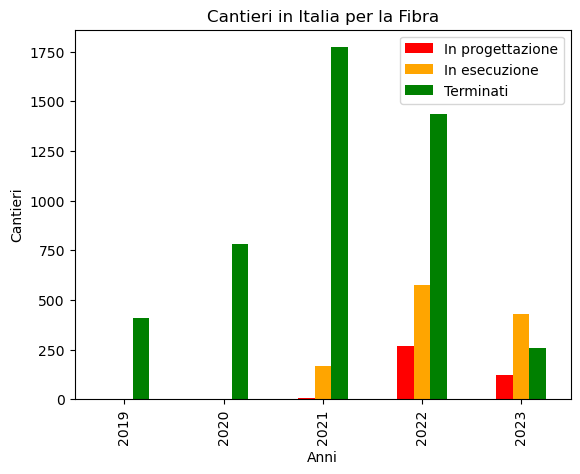

In [57]:
terminati = df[(df['Stato Fibra'].str.contains(str_term, na=False)) & (df['Fibra'] != 0)]['Piano fibra (anno)'].value_counts().sort_index() # sort index gli ordina cronologicamente
in_esecuzione = df[(df['Stato Fibra'].str.contains(str_esec, na=False)) & (df['Fibra'] != 0)]['Piano fibra (anno)'].value_counts().sort_index()
in_progettazione = df[(df['Stato Fibra'].str.contains(str_prog, na=False)) & (df['Fibra'] != 0)]['Piano fibra (anno)'].value_counts().sort_index()

conteggio_combinato_lavori_lomb = pd.DataFrame({'In progettazione': in_progettazione, 'In esecuzione': in_esecuzione, 'Terminati': terminati})
conteggio_combinato_lavori_lomb.plot(kind='bar', color=['red', 'orange', 'green'])
plt.title("Cantieri in Italia per la Fibra")
plt.xlabel('Anni')
plt.ylabel('Cantieri')
plt.show()

Ora analizzeremo in tutta Italia dove è presente la Fibra FTTH e la Fibra FWA.

1-1: 5958, 0-1: 1484, 0-0: 266


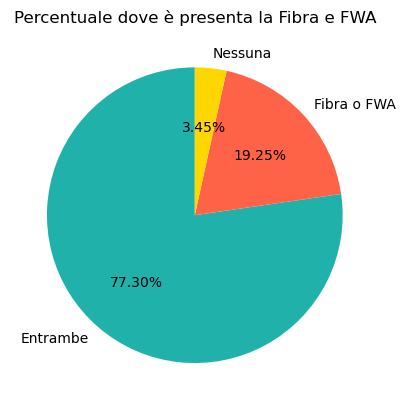

In [58]:
c1_1 = df[(df['Fibra'] == 1) & (df['FWA'] == 1)].shape[0]
c0_1 = df[(df['Fibra'] == 1) | (df['FWA'] == 1)].shape[0] - c1_1 #df[(df['Fibra'] == 1) & (df['FWA'] == 0)].shape[0] + df[(df['Fibra'] == 0) & (df['FWA'] == 1)].shape[0]
c0_0 = df[(df['Fibra'] == 0) & (df['FWA'] == 0)].shape[0]
print(f"1-1: {c1_1}, 0-1: {c0_1}, 0-0: {c0_0}")
totale = pd.Series([c1_1, c0_1, c0_0], index=['Entrambe', 'Fibra o FWA', 'Nessuna'])

totale.plot(kind='pie', autopct='%1.2f%%', startangle=90, colors=['#20B2AA', '#FF6347', 'gold'])

plt.title("Percentuale dove è presenta la Fibra e FWA")
#plt.legend()
plt.show()

Analizzando la fetta arancione (19,25%) possiamo vedere chi prevale tra le due:

In [59]:
fibra = df[(df['Fibra'] == 1) & (df['FWA'] == 0)].shape[0]
fwa = df[(df['Fibra'] == 0) & (df['FWA'] == 1)].shape[0]

print(f"I dati che abbiamo: Fibra = {fibra}, FWA = {fwa}")

if(fibra > fwa):
    print("La fibra è in numero maggiore!")
else:
    print("La FWA è in numero maggiore!")


I dati che abbiamo: Fibra = 274, FWA = 1210
La FWA è in numero maggiore!


Ecco le regioni nello specifico, con il numero di cantieri, dove è dispobibile solo FWA.

In [60]:
tot_fwa_per_regione = df.loc[(df['Fibra'] == 0) & (df['FWA'] == 1), ['Regione']].groupby(by=['Regione']).size()
print("Le regioni dove è presente solo la FWA")
regioni_fwa = pd.DataFrame({'FWA': tot_fwa_per_regione}).sort_values(by='FWA', ascending=False) # avrei potuto usare df[(df['Fibra'] == 0) & (df['FWA'] == 1)]['Regione'].value_counts()
print(regioni_fwa)

Le regioni dove è presente solo la FWA
                            FWA
Regione                        
Lombardia                   292
Sardegna                    175
Calabria                    156
Veneto                      105
Emilia Romagna               96
Piemonte                     83
Campania                     79
Toscana                      44
Puglia                       32
Lazio                        31
Liguria                      30
Friuli Venezia Giulia        26
Marche                       14
Abruzzo                      13
Umbria                       12
Sicilia                       9
Basilicata                    9
Valle d'Aosta                 3
Trentino Alto Adige-Trento    1


Ora Visoniamo per Regione il numero di cantieri aperti e non per la Fibra e FWA.

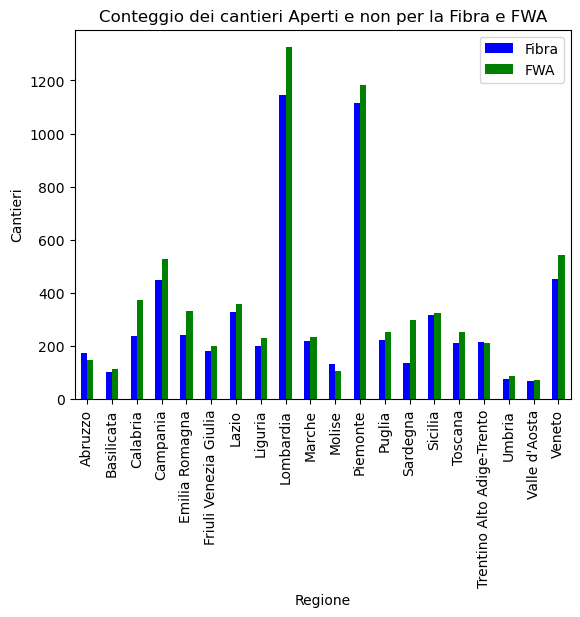

In [61]:
fibra_cablata = df[df['Fibra'] == 1]['Regione'].value_counts() # df.loc[df['Fibra'] == 1, ['Regione', 'Fibra']].groupby(by='Regione').sum()
fwa = df[df['FWA'] == 1]['Regione'].value_counts()

conteggio_combinato = pd.DataFrame({'Fibra': fibra_cablata, 'FWA': fwa})

# Visualizzare il risultato
conteggio_combinato.plot(kind='bar', color=['blue', 'green'])
plt.title("Conteggio dei cantieri Aperti e non per la Fibra e FWA")
plt.xlabel('Regione')
plt.ylabel('Cantieri')
plt.show()

Ora vediamo i lavori terminati.

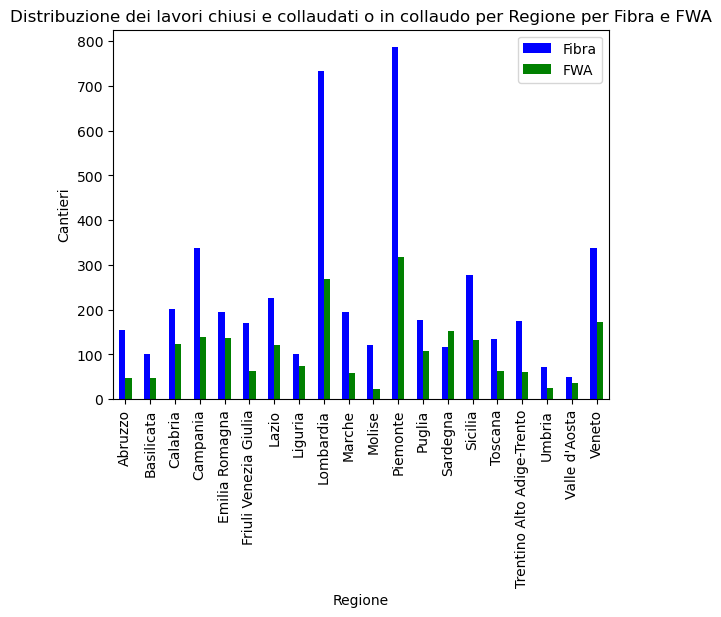

In [62]:
fibra_cablata = df[df['Stato Fibra'].str.contains(str_term, na=False)]['Regione'].value_counts() 
fwa = df[df['Stato FWA'].str.contains(str_term, na=False)]['Regione'].value_counts()

conteggio_combinato_lavori = pd.DataFrame({'Fibra': fibra_cablata, 'FWA': fwa})

# Visualizzare il risultato
conteggio_combinato_lavori.plot(kind='bar', color=['blue', 'green'])
plt.title('Distribuzione dei lavori chiusi e collaudati o in collaudo per Regione per Fibra e FWA')
plt.xlabel('Regione')
plt.ylabel('Cantieri')
plt.show()

Ora i lavori in progettazione.

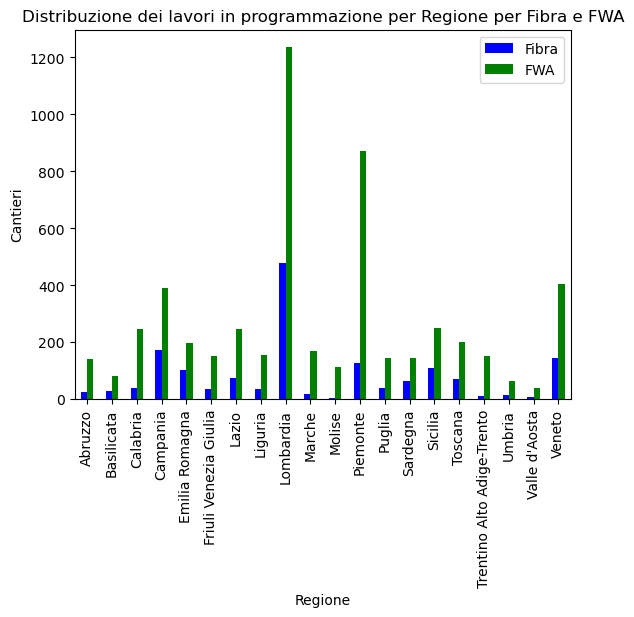

In [63]:
fibra_cablata = df[df['Stato Fibra'].str.contains(str_prog, na=False)]['Regione'].value_counts() 
fwa = df[df['Stato FWA'].str.contains(str_prog, na=False)]['Regione'].value_counts()

conteggio_combinato_lavori = pd.DataFrame({'Fibra': fibra_cablata, 'FWA': fwa})

# Visualizzare il risultato
conteggio_combinato_lavori.plot(kind='bar', color=['blue', 'green'])
plt.title('Distribuzione dei lavori in programmazione per Regione per Fibra e FWA')
plt.xlabel('Regione')
plt.ylabel('Cantieri')
plt.show()

Se andiamo analizzare i cantieri chiusi e collaudati e non, possiamo notare un grande diminuizione per la FWA, invece per la Fibra rimane stabile, rispetto al primo grafico, che mostrava tutti i cantieri aperti e non. 
Poi possimao notare col 3 grafico che i lavori per la FWA sono in ritardo rispetto alla Fibra classica cablata FTTH.

Nei seguenti grafici abbiamo notato che la Lombardia spicca. Più tardi la analizzeremo.

Ora analizziamo l'andamento della Fibra e della FWA divisi per Piani d'anno.

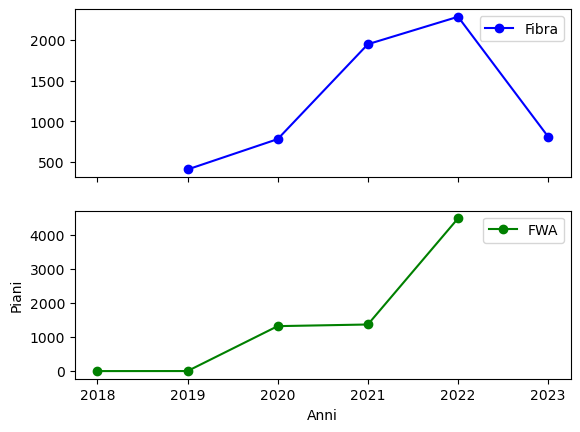

In [64]:
valori_fibra = df[(df['Fibra'] == 1) & (df['Piano fibra (anno)'] != 0)]['Piano fibra (anno)'].value_counts().sort_index()
valori_fwa = df[(df['FWA'] == 1) & (df['Piano FWA (anno)'] != 0)]['Piano FWA (anno)'].value_counts().sort_index()
valori_df = pd.DataFrame({'Fibra': valori_fibra, 'FWA': valori_fwa})

valori_df.plot(marker='o', color=['blue', 'green'], subplots=True)


plt.xlabel('Anni')
plt.ylabel('Piani')
df['Piano FWA (anno)']
df_incr = pd.DataFrame({'Valori': valori_fibra})

Calcoliamo l'incremento percentuale della Fibra, dato che è quella con l'andamento più 'bizzarro'. Qui  abbiamo numeri più grandi poiché prima era tutto diviso per Regione invece qua per anni.

In [65]:
df_incr.loc[2019, 'Incremento %'] = np.nan
for i in range(2020, 2024):
    nuovo_valore = ((df_incr.loc[i,'Valori'] - df_incr.loc[i-1,'Valori'])/df_incr.loc[i-1,'Valori']) * 100 
    df_incr.loc[i,'Incremento %'] = nuovo_valore
df_incr

,Valori,Incremento %
2019,409,NaN
2020,782,91.198044
2021,1947,148.976982
2022,2284,17.308680
2023,810,-64.535902


# Analisi per una regione Specifica
- La Lombardia

Per fare una scelta ho deciso di importare il DataFrame di tutti i comuni italini e di farlo filtrare per le città interessate dal progetto BUL.

In [66]:
df_geo = pd.read_csv('italy_geo.csv', sep=';', encoding='UTF-8')
df_geo.info()
df_geo_citta = df_geo.copy()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7978 entries, 0 to 7977
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   istat   7978 non-null   int64  
 1   comune  7978 non-null   object 
 2   lng     7978 non-null   float64
 3   lat     7978 non-null   float64
dtypes: float64(2), int64(1), object(1)
memory usage: 249.4+ KB


In [67]:
df_geo_citta_filter = df_geo_citta['comune'].isin(df['Citta'].unique())
df_geo_citta = df_geo_citta[df_geo_citta_filter]

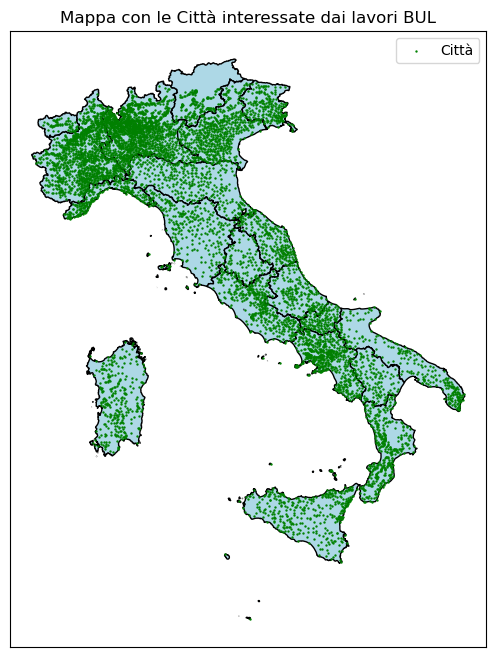

In [68]:
crs_italy = 'EPSG:4326'
geometry = gpd.points_from_xy(df_geo_citta['lng'], df_geo_citta['lat'])
gdf_citta = gpd.GeoDataFrame(df_geo_citta, geometry=geometry, crs=crs_italy)

url_italy = "https://raw.githubusercontent.com/openpolis/geojson-italy/master/geojson/limits_IT_regions.geojson" #URL per le info geometriche per l'Italia, un GeoJSON
italian_regions = gpd.read_file(url_italy)

ax = italian_regions.plot(figsize=(10, 8), color='lightblue', edgecolor='black')

gdf_citta.plot(ax=ax, color='green', markersize=0.5, marker='o', label='Città')

#Tolgo i numeri sulle x e y
ax.set_xticks([])
ax.set_yticks([])

plt.title('Mappa con le Città interessate dai lavori BUL')
plt.legend()
plt.show()

Notiamo dalla figura che La Lombardia è la regione con più citta interessate.

In [69]:
df_lomb = df[df['Regione'] == 'Lombardia']
df_lomb.info()
df_lomb.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1516 entries, 0 to 7703
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Regione             1516 non-null   object
 1   Provincia           1516 non-null   object
 2   Citta               1516 non-null   object
 3   Stato Fibra         1516 non-null   object
 4   Stato FWA           1513 non-null   object
 5   PCN_route           1170 non-null   object
 6   Nome sede PCN       1170 non-null   object
 7   Fibra               1516 non-null   int64 
 8   FWA                 1516 non-null   int64 
 9   Piano fibra (anno)  1516 non-null   int64 
 10  Piano FWA (anno)    1516 non-null   int64 
dtypes: int64(4), object(7)
memory usage: 142.1+ KB


,Regione,Provincia,Citta,Stato Fibra,Stato FWA,PCN_route,Nome sede PCN,Fibra,FWA,Piano fibra (anno),Piano FWA (anno)
0,Lombardia,Pavia,Pizzale,in esecuzione,in progettazione definitiva,POP_PV_34_LUNGAVILLA,Lungavilla,1,1,2023,2022
5,Lombardia,Cremona,Rivarolo del Re ed Uniti,in esecuzione,in progettazione definitiva,POP_MN_02_COMMESSAGGIO,Commessaggio,1,1,2023,2022
8,Lombardia,Milano,Trezzano sul Naviglio,in programmazione,in programmazione,NaN,NaN,0,0,0,0
16,Lombardia,Pavia,Pieve Albignola,in collaudo,terminato,POP_PV_37_PIEVE_ALBIGNOLA,Pieve Albignola,1,1,2021,2020
21,Lombardia,Brescia,Verolanuova,in esecuzione,in collaudo,POP_BS_02_VEROLANUOVA,Verolanuova,1,1,2022,2020


Andiamo ad analizzare i cantieri per la FWA.

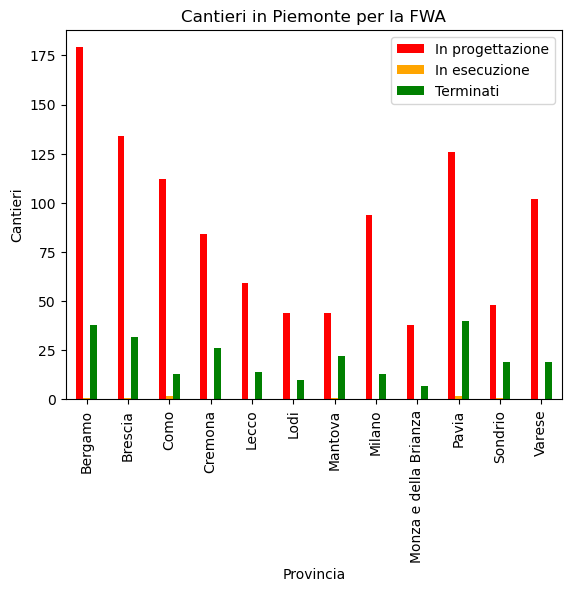

In [70]:
terminati = df_lomb[(df_lomb['Stato FWA'].str.contains(str_term, na=False)) & (df_lomb['FWA'] != 0)]['Provincia'].value_counts().sort_index()
in_esecuzione = df_lomb[(df_lomb['Stato FWA'].str.contains(str_esec, na=False)) & (df_lomb['FWA'] != 0)]['Provincia'].value_counts().sort_index()
in_progettazione = df_lomb[(df_lomb['Stato FWA'].str.contains(str_prog, na=False)) & (df_lomb['FWA'] != 0)]['Provincia'].value_counts().sort_index()

conteggio_combinato_lavori_lomb = pd.DataFrame({'In progettazione': in_progettazione, 'In esecuzione': in_esecuzione, 'Terminati': terminati})
conteggio_combinato_lavori_lomb.plot(kind='bar', color=['red', 'orange', 'green'])
plt.title("Cantieri in Piemonte per la FWA")
plt.xlabel('Provincia')
plt.ylabel('Cantieri')
plt.show()

Ora vediamo i Cantieri divisi per piano d'anno.

Il totale dei piani è: 1325


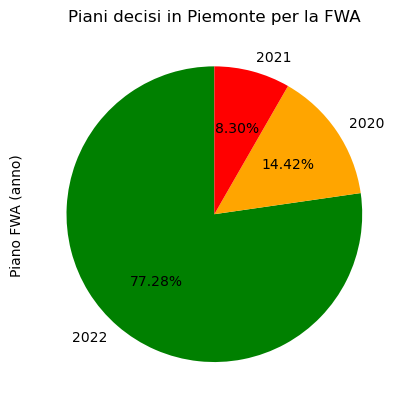

In [71]:
totale = df_lomb[df_lomb['FWA'] == 1]['Piano FWA (anno)'].value_counts()
totale.plot(kind='pie', autopct='%1.2f%%', startangle=90, colors=['green', 'orange', 'red'])
plt.title("Piani decisi in Piemonte per la FWA")
print("Il totale dei piani è:", totale.sum())
plt.show()

Nel 2022 c'è stato un grande aumento del numero di piani. Andiamolo analizzare.

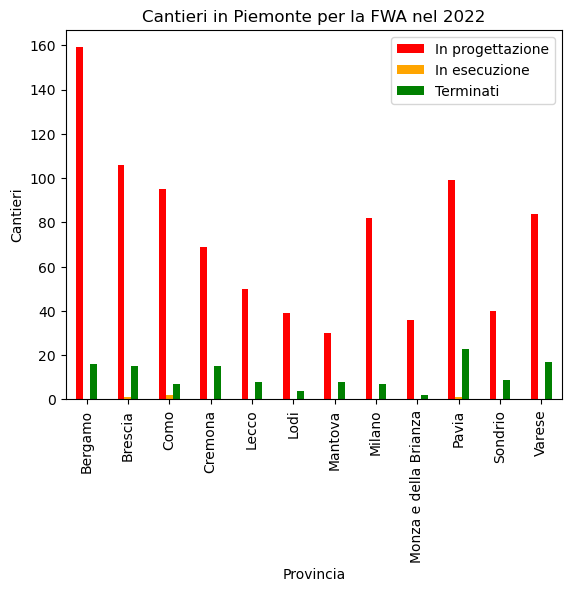

In [72]:
terminati = df_lomb[(df_lomb['Stato FWA'].str.contains(str_term, na=False)) & (df_lomb['Piano FWA (anno)'] == 2022)]['Provincia'].value_counts()
in_esecuzione = df_lomb[(df_lomb['Stato FWA'].str.contains(str_esec, na=False)) & (df_lomb['Piano FWA (anno)'] == 2022)]['Provincia'].value_counts()
in_progettazione = df_lomb[(df_lomb['Stato FWA'].str.contains(str_prog, na=False)) & (df_lomb['Piano FWA (anno)'] == 2022)]['Provincia'].value_counts()

conteggio_combinato_lavori_lomb = pd.DataFrame({'In progettazione': in_progettazione, 'In esecuzione': in_esecuzione, 'Terminati': terminati})
conteggio_combinato_lavori_lomb.plot(kind='bar', color=['red', 'orange', 'green'])
plt.title("Cantieri in Piemonte per la FWA nel 2022")
plt.xlabel('Provincia')
plt.ylabel('Cantieri')
plt.show()

Come notiamo, anche grazie al grafico a torta, possiamo vedere che, anche se abbiamo preso un solo anno, è effettivamente quello con più Cantieri, indipendentmente se sono chiusi o aperti o in progettazione.

Ora vediamo lo stato della Fibra nel 2022 in Piemonte, così per confrontarla con la FWA, qui sopra.

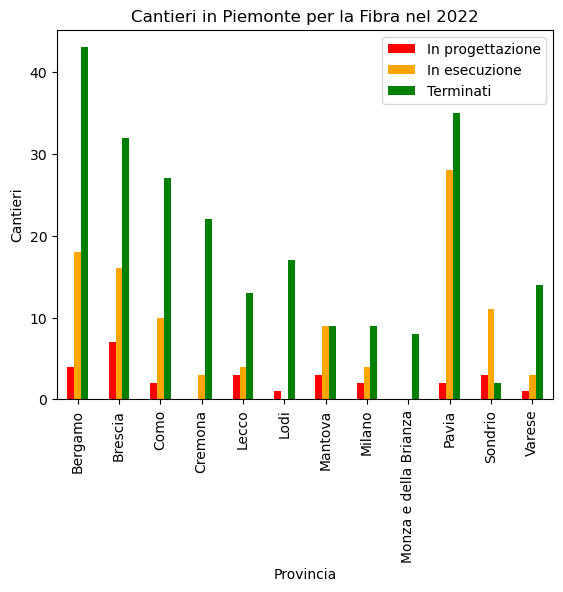

In [73]:
terminati = df_lomb[(df_lomb['Stato Fibra'].str.contains(str_term, na=False)) & (df_lomb['Piano fibra (anno)'] == 2022)]['Provincia'].value_counts()
in_esecuzione = df_lomb[(df_lomb['Stato Fibra'].str.contains(str_esec, na=False)) & (df_lomb['Piano fibra (anno)'] == 2022)]['Provincia'].value_counts()
in_progettazione = df_lomb[(df_lomb['Stato Fibra'].str.contains(str_prog, na=False)) & (df_lomb['Piano fibra (anno)'] == 2022)]['Provincia'].value_counts()

conteggio_combinato_lavori_lomb = pd.DataFrame({'In progettazione': in_progettazione, 'In esecuzione': in_esecuzione, 'Terminati': terminati})
conteggio_combinato_lavori_lomb.plot(kind='bar', color=['red', 'orange', 'green'])
plt.title("Cantieri in Piemonte per la Fibra nel 2022")
plt.xlabel('Provincia')
plt.ylabel('Cantieri')
plt.show()

Notiamo anche qua che il lavoro della Fibra è molto più avanti rispetto a quello della FWA.

# Riferimento per PCN
- Importo un DataFrame dei PCN. Visioniamo tutti i PCN del progetto BUL.

In [74]:
df_pcn = pd.read_csv('pcn_route.csv', sep=';', encoding='UTF-8')
df_pcn['Longitudine'] = df_pcn['Longitudine'].str.replace(',','.')
df_pcn['Latitudine'] = df_pcn['Latitudine'].str.replace(',','.')
df_pcn['Longitudine'] = pd.to_numeric(df_pcn['Longitudine'])
df_pcn['Latitudine'] = pd.to_numeric(df_pcn['Latitudine'])

In [75]:
df_pcn.info()
df_pcn.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 612 entries, 0 to 611
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Regione      612 non-null    object 
 1   Provincia    612 non-null    object 
 2   Comune       612 non-null    object 
 3   Nome PCN     612 non-null    object 
 4   Latitudine   612 non-null    float64
 5   Longitudine  612 non-null    float64
dtypes: float64(2), object(4)
memory usage: 28.8+ KB


,Regione,Provincia,Comune,Nome PCN,Latitudine,Longitudine
0,Abruzzo,Chieti,COLLEDIMEZZO,POP_CH_13_COLLEDIMEZZO,41.986148,14.385157
1,Abruzzo,Chieti,CASOLI,POP_CH_02_CASOLI,42.124997,14.298431
2,Abruzzo,Chieti,ATESSA,POP_CH_04_ATESSA,42.068806,14.457222
3,Abruzzo,Chieti,CASTELGUIDONE,POP_CH_05_CASTELGUIDONE,41.818470,14.523160
4,Abruzzo,Chieti,GUARDIAGRELE,POP_CH_06_GUARDIAGRELE,42.187554,14.212727


In [76]:
#Filtro il dataframe per i PCN che mi interessano (quelli presenti del DF principale)
df_pcn_filtered = df_pcn['Nome PCN'].isin(df['PCN_route'].unique())
df_pcn_2 = df_pcn[df_pcn_filtered]

In [77]:
mappa2 = folium.Map(location=[df_pcn_2['Latitudine'].mean(), df_pcn_2['Longitudine'].mean()], zoom_start=7)

# Aggiungi un CircleMarker alla mappa per ogni riga nel DataFrame
for index, row in df_pcn_2.iterrows():
    folium.CircleMarker(
        location=[row['Latitudine'], row['Longitudine']],
        radius=3,  # Imposta il raggio del cerchio
        color='blue',  # Colore del cerchio
        fill=True,
        fill_color='blue',  # Colore del riempimento
        fill_opacity=0.6,
        popup=f"PCN: {row['Nome PCN']}"
    ).add_to(mappa2)

# Salva la mappa in un file HTML
#mappa2.save('mappa_interattiva_scatter2.html')
display(mappa2)

Mappa che mostra tutti i PCN interessati.

# Modifiche e Analisi del DataFrame Principale
- Creo una nuova colonna per svolgere nuove analisi.

In [78]:
dfd = df.copy()

Tramite dei numeri Random mi creo la colonna 'Fine Lavori', che verranno sommati alla colonna del piano d'anno.

**ATTENZIONE:** Questa parte contiene informazioni random inventate, ma con un criterio logico, cioè non ci sono lavori che finiscono nel 2024.

In [79]:
x = 6
for k in range(2018, 2024):
    condizione = (dfd['Stato Fibra'].str.contains(str_term, na=False)) & (dfd['Piano fibra (anno)'] == k)
    dfd.loc[condizione, 'Fine Lavori' ] = dfd.loc[condizione, 'Piano fibra (anno)'] + np.random.randint(0, x, size=len(dfd[condizione]))
    x -= 1

In [80]:
dfd[dfd['Fine Lavori'] == 2024].shape[0]

0

Droppo tutte le righe che non hanno finito i lavori

In [81]:
dfd.dropna(subset=['Fine Lavori'], inplace=True)
dfd['Fine Lavori'] = dfd['Fine Lavori'].astype(int)
len(dfd) # != 7708

4658

Qua creo una colonna 'Durata', per calcolare la durata effettiva del cantiere.

In [82]:
dfd['Durata'] = dfd['Fine Lavori'] - dfd['Piano fibra (anno)']
dfd['Durata'] = dfd['Durata'].astype(float)
dfd.loc[dfd['Durata'] == 0,'Durata'] = (np.random.randint(4, 10, size=np.sum(dfd['Durata'] == 0))*pow(10, -1)) # Ho fatto questo per dare dei valori in 0.x anni quindi 0.x * 12 mesi

Qui calcolo la media di durata dei lavori divisi per Regione. 

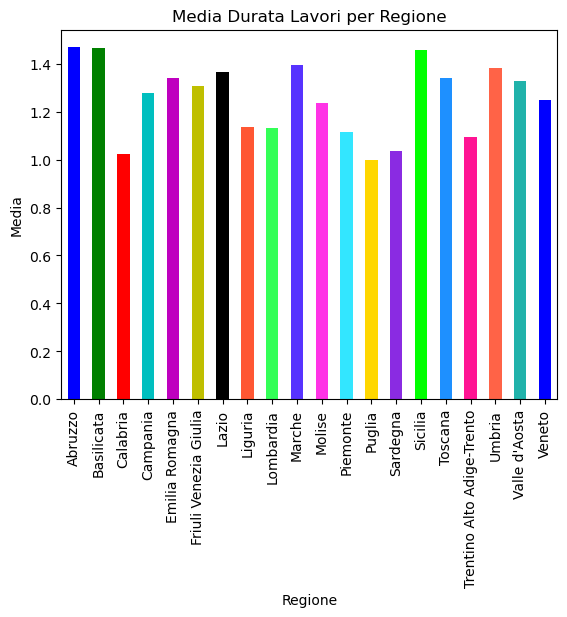

In [83]:
dfd.groupby(by='Regione')['Durata'].mean().plot(kind='bar', color = [
    'b', 'g', 'r', 'c', 'm', 'y', 'k',
    '#FF5733', '#33FF57', '#5733FF', '#FF33E6', '#33E6FF',
    '#FFD700', '#8A2BE2', '#00FF00', '#1E90FF', '#FF1493',
    '#FF6347', '#20B2AA']
)

plt.xlabel('Regione')
plt.ylabel('Media')
plt.title('Media Durata Lavori per Regione')

plt.show()

In [84]:
media_gen = dfd['Durata'].mean()
mediana_gen = dfd['Durata'].median()
if(media_gen > mediana_gen): skew = 'positivo'
else: skew = 'negativo'
print(f"Media: {media_gen}, Mediana: {mediana_gen}")

Media: 1.2242593387720053, Mediana: 1.0


In [85]:
dfd['Durata'].skew()

1.505679200343903

In [86]:
dfd.describe()

,Fibra,FWA,Piano fibra (anno),Piano FWA (anno),Fine Lavori,Durata
count,4658.0,4658.000000,4658.000000,4658.000000,4658.000000,4658.000000
mean,1.0,0.954058,2021.077072,1928.469944,2022.053886,1.224259
std,0.0,0.209383,1.022123,423.233618,0.997256,0.764698
min,1.0,0.000000,2019.000000,0.000000,2019.000000,0.400000
25%,1.0,1.000000,2020.000000,2020.000000,2021.000000,0.700000
50%,1.0,1.000000,2021.000000,2022.000000,2022.000000,1.000000
75%,1.0,1.000000,2022.000000,2022.000000,2023.000000,2.000000
max,1.0,1.000000,2023.000000,2022.000000,2023.000000,4.000000


Ecco i dati generali con delle aggiunte, In particolare ci interessano le colonne Piano fibra (anno), Fine lavori e Durata.

Per le colonne 'Fibra' e 'FWA' (che sono dati 1 o 0), possiamo verificare, tramite la riga della media mean, che la Fibra (1.0 di media), ha solo valori 1, quindi come vogliamo noi, e FWA (0.96 di media) anche valori 0, cosa che però non ci interessa dato che l'interesse è solo per la fibra.

In [87]:
dfd['Durata'].value_counts()

1.0    1615
2.0     911
0.5     326
0.7     307
0.4     296
0.6     291
0.8     286
0.9     281
3.0     267
4.0      78
Name: Durata, dtype: int64

Possiamo notare che 1 anno è la durata con più occorrenze.

Nella Sezione 'Analisi di una Regione Specifica' abbiamo visionato la Lombardia, vediamo la durata dei lavori in Lombardia.

In [88]:
dfd[dfd['Regione'] == 'Lombardia']['Durata'].value_counts()

1.0    234
2.0    126
0.5     60
0.8     59
0.7     56
0.9     56
0.6     52
0.4     52
3.0     30
4.0      9
Name: Durata, dtype: int64

Confrontando i due output delle due celle possiamo notare che i dati sono abbastanza proporzionali, questo è dovuto dal random randint.

Ora vediamo la Durata media divisi per piano d'anno.

<Axes: xlabel='Piano fibra (anno)'>

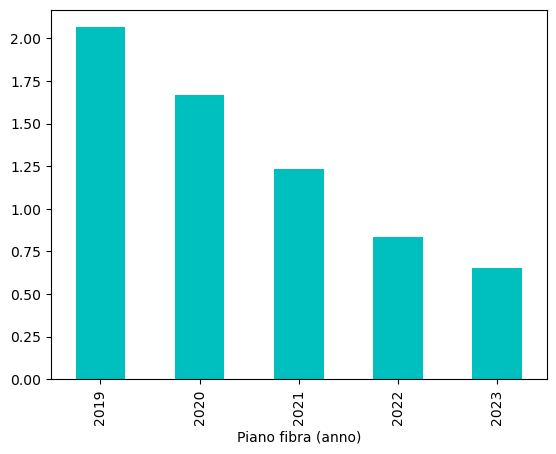

In [89]:
dfd.groupby(by='Piano fibra (anno)')['Durata'].mean().plot(kind='bar', color='c')

Notiamo che il 2019 è quello con la durata dei lavori più lunga. Una cosa normale visto che quando ho creato la colonna Fine Lavori l'estremo maggiore del range dei numeri random diminuiva con l'avanzare del for, e si vede anche in questo grafico.

# Query Aggiuntive

- In questo caso prendo il DataFrame dei comuni italiani, per vedere le città dove i lavori della FWA sono in esecuzione o dove è attiva la FWA.

In [90]:
#Modifico il DF
df_geo_2 = df_geo.copy()
condizione_esec = df_geo_2['comune'].isin(df.loc[df['Stato FWA'] == 'in esecuzione','Citta'])
df_geo_2.loc[condizione_esec,'Stato'] = 'In esecuzione'
condizione_term = df_geo_2['comune'].isin(df.loc[df['Stato FWA'] == 'terminato','Citta'])
df_geo_2.loc[condizione_term,'Stato'] = 'In funzione'


Modifico il DataFrame copiato, aggiugendo una colonna 'Stato', che aggiunge una specifica per ogni comune. Specifica che è presa secondo un criterio grazie al DataFrame principale. 

In [91]:
df_geo_2.dropna(subset=['Stato'])

,istat,comune,lng,lat,Stato
4,1005,Alice Superiore,7.777019,45.460094,In esecuzione
6,1007,Alpette,7.578597,45.409982,In funzione
9,1010,Andrate,7.873839,45.528375,In funzione
23,1024,Beinasco,7.579158,45.022079,In funzione
35,1036,Brosso,7.803334,45.492760,In funzione
...,...,...,...,...,...
7947,111077,Serramanna,8.921285,39.424655,In funzione
7951,111081,Seui,9.324065,39.839749,In funzione
7952,111082,Seulo,9.238482,39.867961,In funzione
7959,111089,Teulada,8.772505,38.968132,In funzione


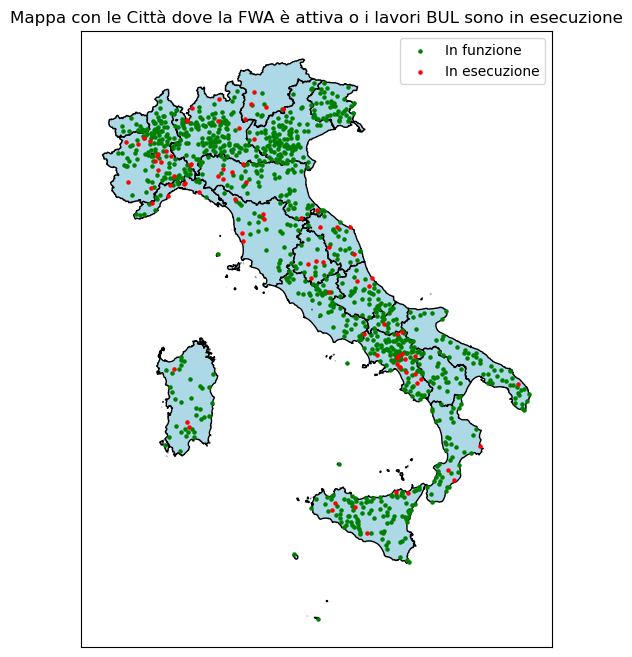

In [92]:

geometry = gpd.points_from_xy(df_geo_2['lng'], df_geo_2['lat'])
gdf_punti_interesse = gpd.GeoDataFrame(df_geo_2, geometry=geometry, crs=crs_italy)

italian_regions = gpd.read_file(url_italy)


ax = italian_regions.plot(figsize=(10, 8), color='lightblue', edgecolor='black')

gdf_in_funzione = gdf_punti_interesse[gdf_punti_interesse['Stato'] == 'In funzione']
gdf_in_esecuzione = gdf_punti_interesse[gdf_punti_interesse['Stato'] == 'In esecuzione']

gdf_in_funzione.plot(ax=ax, color='green', markersize=5, marker='o', label='In funzione')
gdf_in_esecuzione.plot(ax=ax, color='red', markersize=5, marker='o', label='In esecuzione')


for x, y, label in zip(gdf_punti_interesse.geometry.x, gdf_punti_interesse.geometry.y, gdf_punti_interesse['comune']):
    ax.text(x, y, '', fontsize=8, ha='right')

#Tolgo i numeri sulle x e y
ax.set_xticks([])
ax.set_yticks([])

plt.title('Mappa con le Città dove la FWA è attiva o i lavori BUL sono in esecuzione')
plt.legend()
plt.show()


Dalla Mappa comunque possiamo notare che la maggior parte dei lavori conclusi sia al Nord o segua comunque la catena Appenninica. Questo probabilmente ci può dire che le montagne o colline possono essere 'superate' facilemente grazie alla rete Wireless della FWA.

- Nella prima sezione di 'Analisi Generale' avevamo visto un grafico a torta che rappresentava in Italia quali città avevano la Fibra e FWA. Andiamo a visionare le città senza nulla.

In [93]:
df_geo_na = df_geo.copy()
df_geo_na_filter = df_geo['comune'].isin(df[(df['Fibra'] == 0) & (df['FWA'] == 0)]['Citta'].unique())
df_geo_na = df_geo_na[df_geo_na_filter]
df_geo_na.count() ## 266 erano le citta che ci interessano, probabilmente il csv dei lavori contiene anche le frazioni, cosa non contenuta nel csv dei comuni.


istat     253
comune    253
lng       253
lat       253
dtype: int64

In [97]:
mappa_na = folium.Map(location=[df_geo_na['lat'].mean(), df_geo_na['lng'].mean()], zoom_start=7)

# Aggiungi un CircleMarker alla mappa per ogni riga nel DataFrame
for index, row in df_geo_na.iterrows():
    folium.CircleMarker(
        location=[row['lat'], row['lng']],
        radius=3,  # Imposta il raggio del cerchio
        color='blue',  # Colore del cerchio
        fill=True,
        fill_color='blue',  # Colore del riempimento
        fill_opacity=0.6,
        popup=f"Comune: {row['comune']}"
    ).add_to(mappa_na)

# Salva la mappa in un file HTML
#mappa_na.save('mappa_interattiva_scatter2.html')
display(mappa_na)

- Ora vediamo sempre grazie ad una mappa interrativa le città non coinvolte dal BUL.

In [95]:
df_geo_citta_notin = df_geo.copy()
df_geo_citta_notin_filter = ~df_geo['comune'].isin(df['Citta'].unique())
df_geo_citta_notin = df_geo_citta_notin[df_geo_citta_notin_filter]
df_geo_citta_notin.count()

istat     538
comune    538
lng       538
lat       538
dtype: int64

In [98]:
mappa_notin = folium.Map(location=[df_geo_citta_notin['lat'].mean(), df_geo_citta_notin['lng'].mean()], zoom_start=7)

# Aggiungi un CircleMarker alla mappa per ogni riga nel DataFrame
for index, row in df_geo_citta_notin.iterrows():
    folium.CircleMarker(
        location=[row['lat'], row['lng']],
        radius=3,  # Imposta il raggio del cerchio
        color='blue',  # Colore del cerchio
        fill=True,
        fill_color='blue',  # Colore del riempimento
        fill_opacity=0.6,
        popup=f"Comune: {row['comune']}"
    ).add_to(mappa_notin)

# Salva la mappa in un file HTML
#mappa_notin.save('mappa_interattiva_scatter2.html')
display(mappa_notin)

Notiamo grande prevalenza nella zona Alto Adige e nell'abbruzzo.

# Sitografia
- Progetto BUL e DataFrame Principale: https://bandaultralarga.italia.it/
- DataFrame Comuni Italiani: https://github.com/MatteoHenryChinaski/Comuni-Italiani-2018-Sql-Json-excel
- DataFram PCN: https://www.infratelitalia.it/-/media/infratel/documents/elenco-dei-pcn-consegnati-da-open-fiber.xlsx?la=it-it&hash=6D6523EA24A46D18E01BB94C8F02AC6B2017C2A6